In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
data_dir = "archive"  

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = ImageFolder(root=data_dir , transform=transform)
# loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = int(test_ratio * total_size)
val_size = total_size - test_size - train_size
# Perform the split
train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader instances
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [4]:
class ChessPieceRes_18(nn.Module):
    def __init__(self, num_classes):
        super(ChessPieceRes_18, self).__init__()
        self.model = models.resnet18(pretrained=True).to(device)  # Using ResNet18 as a base
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes).to(device)  # Adjusting the final layer

    def forward(self, x):
        return self.model(x)

num_classes = len(dataset.classes)
model = ChessPieceRes_18(num_classes=num_classes)

/home/cadmin/anaconda3/envs/Data_Science/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/cadmin/anaconda3/envs/Data_Science/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
num_epochs = 17
loss_res18 = []
loss_val_res18 = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader)
    loss_res18.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    correct = 0
    total = 0
    
    running_loss_val = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images.to(device))
            loss_val = criterion(outputs, labels.to(device))
            running_loss_val += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

        epoch_loss_val = running_loss_val / len(val_loader)
        loss_val_res18.append(epoch_loss_val)
    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy:.2f}%')


Epoch [1/17], Loss: 28.8432
Validation Accuracy: 59.09%
Epoch [2/17], Loss: 12.0061
Validation Accuracy: 87.88%
Epoch [3/17], Loss: 5.3076
Validation Accuracy: 86.36%
Epoch [4/17], Loss: 4.4231
Validation Accuracy: 86.36%
Epoch [5/17], Loss: 5.1227
Validation Accuracy: 77.27%
Epoch [6/17], Loss: 6.4755
Validation Accuracy: 83.33%
Epoch [7/17], Loss: 2.6639
Validation Accuracy: 86.36%
Epoch [8/17], Loss: 3.6617
Validation Accuracy: 86.36%
Epoch [9/17], Loss: 3.0397
Validation Accuracy: 81.82%
Epoch [10/17], Loss: 4.0494
Validation Accuracy: 83.33%
Epoch [11/17], Loss: 1.8031
Validation Accuracy: 89.39%
Epoch [12/17], Loss: 2.6412
Validation Accuracy: 90.91%
Epoch [13/17], Loss: 2.6048
Validation Accuracy: 83.33%
Epoch [14/17], Loss: 2.5544
Validation Accuracy: 89.39%
Epoch [15/17], Loss: 1.6092
Validation Accuracy: 84.85%
Epoch [16/17], Loss: 4.3959
Validation Accuracy: 86.36%
Epoch [17/17], Loss: 1.1821
Validation Accuracy: 93.94%


In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 95.38%


In [9]:
class ChessPieceRes_50(nn.Module):
    def __init__(self, num_classes):
        super(ChessPieceRes_50, self).__init__()
        self.model = models.resnet50(pretrained=True).to(device)  # Using ResNet18 as a base
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes).to(device)  # Adjusting the final layer

    def forward(self, x):
        return self.model(x)

num_classes = len(dataset.classes)
model = ChessPieceRes_50(num_classes=num_classes)

/home/cadmin/anaconda3/envs/Data_Science/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
num_epochs = 17
loss_res50 = []
loss_val_res50 = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader)
    loss_res50.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    correct = 0
    total = 0
    
    running_loss_val = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images.to(device))
            loss_val = criterion(outputs, labels.to(device))
            running_loss_val += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

        epoch_loss_val = running_loss_val / len(val_loader)
        loss_val_res50.append(epoch_loss_val)
    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy:.2f}%')




Epoch [1/17], Loss: 31.0472
Validation Accuracy: 54.55%
Epoch [2/17], Loss: 18.5953
Validation Accuracy: 57.58%
Epoch [3/17], Loss: 11.4994
Validation Accuracy: 66.67%
Epoch [4/17], Loss: 11.3418
Validation Accuracy: 50.00%
Epoch [5/17], Loss: 7.2003
Validation Accuracy: 66.67%
Epoch [6/17], Loss: 15.9957
Validation Accuracy: 81.82%
Epoch [7/17], Loss: 8.8946
Validation Accuracy: 71.21%
Epoch [8/17], Loss: 8.8727
Validation Accuracy: 84.85%
Epoch [9/17], Loss: 6.3962
Validation Accuracy: 80.30%
Epoch [10/17], Loss: 7.0612
Validation Accuracy: 78.79%
Epoch [11/17], Loss: 7.4154
Validation Accuracy: 66.67%
Epoch [12/17], Loss: 6.3922
Validation Accuracy: 80.30%
Epoch [13/17], Loss: 5.7842
Validation Accuracy: 80.30%
Epoch [14/17], Loss: 3.3681
Validation Accuracy: 92.42%
Epoch [15/17], Loss: 3.2932
Validation Accuracy: 89.39%
Epoch [16/17], Loss: 3.8937
Validation Accuracy: 86.36%
Epoch [17/17], Loss: 2.5556
Validation Accuracy: 81.82%


In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 84.62%


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [14]:
import torch.nn.functional as F
class CustomCNN(nn.Module):
    def __init__(self, num_classes, device):
        super(CustomCNN, self).__init__()

        # First Convolutional Block
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1).to(device) 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1).to(device) 
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1).to(device) 
        # self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1).to(device) 
        # self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1).to(device) 
        
        # Max Pooling Layer
        self.pool = nn.MaxPool2d(2, 2).to(device) 

        # Fully Connected Layer to map features to num_classes
        # Calculate the size after all convolutional and pooling layers
        self.fc1 = nn.Linear(512 * 8 * 8, 512).to(device)  # Updated for 512 * 8 * 8 after 5 conv layers
        self.fc2 = nn.Linear(512, num_classes).to(device)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.5).to(device)

    def forward(self, x):
        # Pass through convolutional blocks
        x = F.relu(self.conv1(x))  # Conv1
        x = F.relu(self.conv2(x))  # Conv2
        x = F.relu(self.conv3(x))  # Conv3
        # x = F.relu(self.conv4(x))  # Conv4
        # x = F.relu(self.conv5(x))  # Conv5

        # Apply pooling after all conv layers
        x = self.pool(x)  # Conv5 + Pool

        # Flatten the output from conv layers: (batch_size, 512, 8, 8)
        x = x.view(-1, 512 * 8 * 8)  # Adjusted dimension after 5 layers of conv and pooling

        # Pass through fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x
# Instantiate the model
num_classes = len(dataset.classes)  # Replace with your number of classes
model = CustomCNN(num_classes=num_classes,device=device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# num_epochs = 25
# loss_custom = []
# loss_val_custom = []

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0

#     for images, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(images.to(device))
#         loss = criterion(outputs, labels.to(device))
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     epoch_loss = running_loss / len(train_loader)
#     loss_custom.append(epoch_loss)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

#     # Validation
#     model.eval()
#     correct = 0
#     total = 0
    
#     running_loss_val = 0.0
#     with torch.no_grad():
#         for images, labels in val_loader:
#             outputs = model(images.to(device))
#             loss_val = criterion(outputs, labels.to(device))
#             running_loss_val += loss.item() * images.size(0)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels.to(device)).sum().item()

#         epoch_loss_val = running_loss_val / len(val_loader)
#         loss_val_custom.append(epoch_loss_val)
#     val_accuracy = 100 * correct / total
#     print(f'Validation Accuracy: {val_accuracy:.2f}%')

In [17]:
# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for images, labels in test_loader:
#         outputs = model(images.to(device))
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels.to(device)).sum().item()

# test_accuracy = 100 * correct / total
# print(f'Test Accuracy: {test_accuracy:.2f}%')

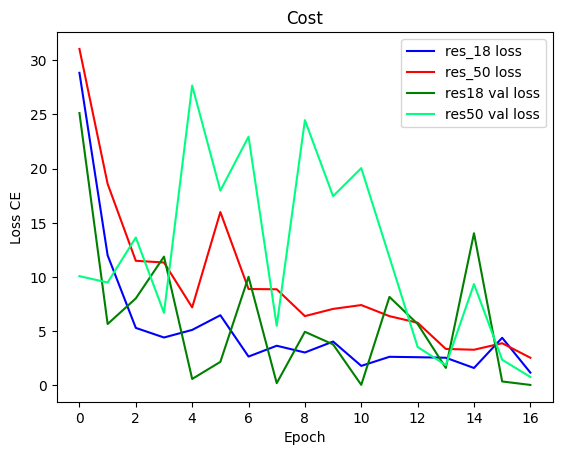

In [18]:
plt.plot(loss_res18,color='b', label="res_18 loss")
plt.plot(loss_res50,color='r', label="res_50 loss")
plt.plot(loss_val_res18,color='g',label="res18 val loss")
plt.plot(loss_val_res50,color=(0,1,0.5),label="res50 val loss")
plt.title("Cost")
plt.xlabel("Epoch")
plt.ylabel("Loss CE")
plt.legend()
plt.show()